# Student Performance

In [102]:
!uv add numpy scipy matplotlib seaborn pandas scikit-learn

Resolved 57 packages in 4ms
Audited 53 packages in 0.95ms


In [103]:
from pathlib import Path

runtime_path = Path.cwd()
DATA_DIR = runtime_path / ".." / "data"

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="white", palette="pastel")

## Data (DOI: 10.24432/C5TG7T)

In [105]:
df = pd.read_csv(DATA_DIR / "student-mat.csv", sep=";")

In [106]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [107]:
df.select_dtypes(include=["object", "string"]).describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [108]:
df.select_dtypes(exclude=["object", "string"]).describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [109]:
df[["G1", "G2", "G3"]].corr()

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


**Conclusion:**
- No missing values.
- The target attribute G3 has a strong correlation with attributes G2 and G1. We choose to remove G1 and G2 and perform the prediction using only G3.

In [110]:
df = df.drop(["G1", "G2"], axis=1)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,10


In [111]:
# Do min-max standardizing to all numerical columns
num_cols = df.select_dtypes(exclude=["object", "string"]).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [112]:
# Do one-hot encoding for all object/str columns
df = pd.get_dummies(
    df,
    columns=df.select_dtypes(include=["object", "string"]).columns,
    drop_first=False,
)
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.000000,0.75,0.50,0.75,0.00,...,True,False,False,True,False,True,True,False,True,False
1,0.285714,0.25,0.25,0.000000,0.333333,0.000000,1.00,0.50,0.50,0.00,...,True,False,True,False,False,True,False,True,True,False
2,0.000000,0.25,0.25,0.000000,0.333333,1.000000,0.75,0.50,0.25,0.25,...,True,False,False,True,False,True,False,True,True,False
3,0.000000,1.00,0.50,0.000000,0.666667,0.000000,0.50,0.25,0.25,0.00,...,False,True,False,True,False,True,False,True,False,True
4,0.142857,0.75,0.75,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.00,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.714286,0.50,0.50,0.000000,0.333333,0.666667,1.00,1.00,0.75,0.75,...,True,False,False,True,False,True,True,False,True,False
391,0.285714,0.75,0.25,0.333333,0.000000,0.000000,0.25,0.75,1.00,0.50,...,True,False,True,False,False,True,False,True,True,False
392,0.857143,0.25,0.25,0.000000,0.000000,1.000000,1.00,1.00,0.50,0.50,...,True,False,True,False,False,True,True,False,True,False
393,0.428571,0.75,0.50,0.666667,0.000000,0.000000,0.75,0.75,0.00,0.50,...,True,False,True,False,False,True,False,True,True,False


In [113]:
# Split the dataset into 80% for training set and 20% for evaluation set
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

In [114]:
train_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
181,0.142857,0.75,0.75,0.000000,0.333333,0.000000,0.75,0.25,0.50,0.00,...,False,True,False,True,False,True,False,True,False,True
194,0.142857,0.50,0.75,0.333333,0.000000,0.000000,1.00,0.50,0.50,0.00,...,True,False,False,True,False,True,False,True,True,False
173,0.142857,0.25,0.75,0.000000,0.333333,1.000000,0.75,0.50,1.00,0.00,...,False,True,True,False,False,True,False,True,False,True
63,0.142857,1.00,0.75,0.000000,0.666667,0.000000,0.50,0.75,0.75,0.25,...,False,True,False,True,False,True,False,True,True,False
253,0.142857,0.50,0.25,0.333333,0.000000,0.000000,0.50,0.50,0.25,0.00,...,False,True,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.000000,1.00,0.50,0.000000,1.000000,0.000000,0.50,0.50,0.50,0.00,...,True,False,False,True,False,True,False,True,True,False
106,0.000000,0.50,0.50,0.000000,1.000000,0.000000,1.00,0.00,0.25,0.00,...,True,False,False,True,False,True,False,True,True,False
270,0.571429,0.75,0.75,0.000000,0.333333,0.666667,0.75,0.50,1.00,0.50,...,False,True,False,True,False,True,False,True,True,False
348,0.285714,1.00,0.75,0.000000,0.666667,0.000000,0.75,0.75,0.50,0.00,...,False,True,False,True,False,True,False,True,False,True


In [115]:
eval_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
78,0.285714,0.50,0.25,0.333333,0.000000,1.000000,0.75,1.00,0.00,0.00,...,False,True,False,True,True,False,False,True,True,False
371,0.428571,0.25,0.50,0.666667,0.000000,0.000000,0.75,0.50,0.50,0.25,...,False,True,False,True,True,False,False,True,False,True
248,0.428571,0.75,0.75,0.000000,0.333333,0.333333,0.75,0.50,0.50,0.00,...,True,False,False,True,False,True,False,True,False,True
55,0.142857,0.50,0.25,0.000000,0.333333,0.000000,1.00,0.50,0.75,0.00,...,False,True,False,True,False,True,False,True,False,True
390,0.714286,0.50,0.50,0.000000,0.333333,0.666667,1.00,1.00,0.75,0.75,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0.285714,0.25,0.50,0.333333,0.333333,0.000000,0.50,0.25,0.25,0.00,...,True,False,True,False,False,True,True,False,True,False
82,0.000000,0.75,0.50,0.000000,0.333333,0.000000,0.75,0.75,0.75,0.00,...,True,False,False,True,False,True,False,True,True,False
114,0.000000,0.50,0.25,0.000000,0.333333,0.000000,1.00,0.75,0.25,0.00,...,False,True,False,True,False,True,False,True,False,True
3,0.000000,1.00,0.50,0.000000,0.666667,0.000000,0.50,0.25,0.25,0.00,...,False,True,False,True,False,True,False,True,False,True


In [116]:
train_X, train_y = df.drop(["G3"], axis=1), df["G3"]
eval_X, eval_y = df.drop(["G3"], axis=1), df["G3"]

In [117]:
def run_tree_regression_experiment(
        train_X,
        train_y,
        eval_X,
        eval_y,
        model,
):
    """
    Train and evaluate a regression model on a fixed train/eval split.

    :param train_X, train_y, eval_X, eval_y:
        Training and evaluation data.
    :param model:
        A pre-instantiated sklearn regressor (e.g. DecisionTreeRegressor(**params)).
    :param random_state:
        Kept for interface consistency; not used if the model already fixes randomness.
    """

    model.fit(train_X, train_y)
    y_pred = model.predict(eval_X)

    y_true = np.asarray(eval_y).ravel()
    y_pred = np.asarray(y_pred).ravel()

    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)

    return y_true, y_pred, mse, rmse, r2

In [118]:
def draw_plot(y_true, y_pred, model_name):
    lo = min(y_true.min(), y_pred.min())
    hi = max(y_true.max(), y_pred.max())

    plt.figure()
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([lo, hi], [lo, hi])  # y = x reference line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Predicted vs Actual: {model_name}")
    plt.xlim(lo, hi)
    plt.ylim(lo, hi)
    plt.show()

In [119]:
y_true, y_pred, mse, rmse, r2 = run_tree_regression_experiment(
    train_X, train_y,
    eval_X, eval_y,
    model=DecisionTreeRegressor(max_depth=10, random_state=42)
)

print(f"\n===== DecisionTreeRegressor =====")
print(f"MSE : {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R^2 : {r2:.6f}")


===== DecisionTreeRegressor =====
MSE : 0.005569
RMSE: 0.074627
R^2 : 0.893599


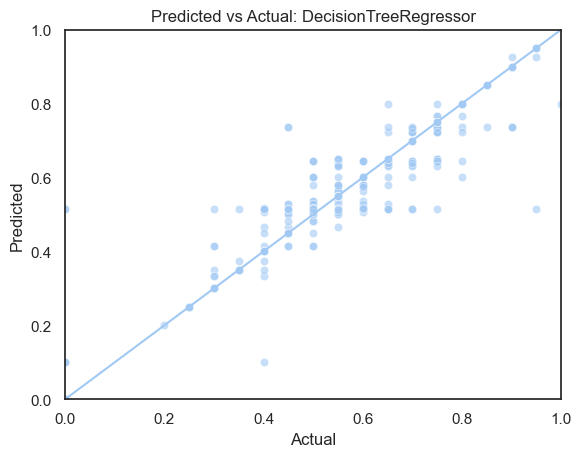

In [120]:
draw_plot(y_true, y_pred, "DecisionTreeRegressor")

In [121]:
y_true, y_pred, mse, rmse, r2 = run_tree_regression_experiment(
    train_X, train_y,
    eval_X, eval_y,
    model=RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
)

print(f"\n===== RandomForestRegressor =====")
print(f"MSE : {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R^2 : {r2:.6f}")


===== RandomForestRegressor =====
MSE : 0.007263
RMSE: 0.085223
R^2 : 0.861237


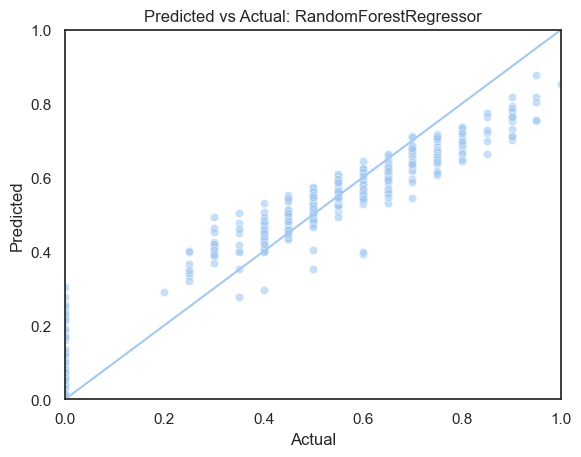

In [122]:
draw_plot(y_true, y_pred, "RandomForestRegressor")

In [123]:
y_true, y_pred, mse, rmse, r2 = run_tree_regression_experiment(
    train_X, train_y,
    eval_X, eval_y,
    model=ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42)
)

print(f"\n===== ExtraTreesRegressor =====")
print(f"MSE : {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R^2 : {r2:.6f}")


===== ExtraTreesRegressor =====
MSE : 0.006825
RMSE: 0.082612
R^2 : 0.869612


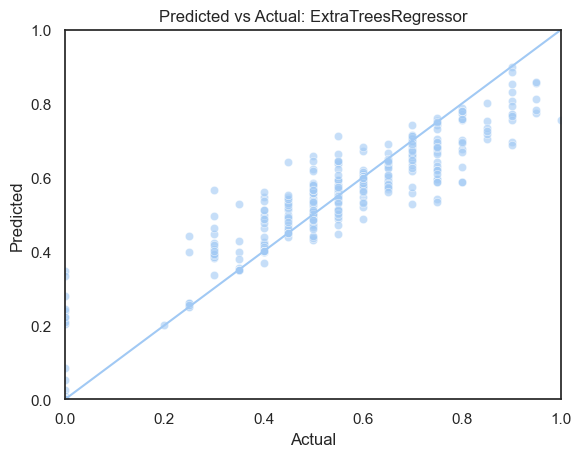

In [124]:
draw_plot(y_true, y_pred, "ExtraTreesRegressor")

## Conclusion:

### 1. Accuracy and generalization

- DecisionTreeRegressor achieves the best numerical accuracy, but its Predicted vs. Actual plot shows a wider scatter around the $y=x$ line, indicating higher variance and less stable predictions.
- RandomForestRegressor and ExtraTreesRegressor have slightly worse metrics, yet their points are more tightly aligned with the diagonal, suggesting smoother behavior and better generalization.
- Both ensemble models also show mild underestimation at higher target values, visible as points falling below the $y=x$ line.

### 2. Differences in model behavior

- The single decision tree produces piecewise, irregular predictions that can vary strongly between samples, which explains the larger dispersion in its plot.
- Ensemble methods average many trees, reducing variance and leading to more concentrated prediction patterns.
- Extra Trees introduces additional randomness in splits, while Random Forest relies on bootstrapping, but both result in more stable and robust predictions compared to a single tree.